#  <center> Projeto de previsão de preços imobiliários
O presente trabalho visa analisar um conjunto de dados obtidos no kaggle aplicando os conceitos de Data Mining. Para o desenvolvimento do trabalho, será aplicado a metodologia CRISP-DM que envolve as seguintes fases: <br>
    <br>
    - Business Understanding 
    - Data Understanding 
    - Data Preparation 
    - Modeling 
    - Evaluation 
    - Deployment 


# Importação das bibliotecas básicas

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# 2 - Entendimento dos dados

### <font color='red'> Pré - processamento </font>

In [57]:
"""
Dicionário de dados:
City: Cidade onde o imóvel está localizada
Area: Área do imóvel
Rooms: Numero de quartos que cada imóvel possui
Bathroom:Numero de banheiros que cada imóvel possui
Parking spaces:Quantidade de vagas de estacionamento que cada imóvel possui
Floor:Quantidade de andar que cada imóvel possui
Animal: Indica se o imóvel aceita ou não da presença de animais
Furniture: Indica se o imóvel é mobiliado ou não
Hoa: (homeowners association fee) Valor do condomínio
Rent amount: Valor de aluguel
Property tax: IPTU
Fire insurance: Seguro incêncio
Total: Valor total pago
"""

'\nDicionário de dados:\nCity: Cidade onde o imóvel está localizada\nArea: Área do imóvel\nRooms: Numero de quartos que cada imóvel possui\nBathroom:Numero de banheiros que cada imóvel possui\nParking spaces:Quantidade de vagas de estacionamento que cada imóvel possui\nFloor:Quantidade de andar que cada imóvel possui\nAnimal: Indica se o imóvel aceita ou não da presença de animais\nFurniture: Indica se o imóvel é mobiliado ou não\nHoa: (homeowners association fee) Valor do condomínio\nRent amount: Valor de aluguel\nProperty tax: IPTU\nFire insurance: Seguro incêncio\nTotal: Valor total pago\n'

**Abaixo, segue a importação e a impressão do dataset com seus respetivos atributos e instâncias**

In [58]:
df = pd.read_csv('houses_to_rent_v2.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


**Imprimindo o tamanho do conjunto de dados carregado assim como todas as classes do dataset**

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [60]:
# **Imprimindo todas as classes que constituem o dataset.**
# df.columns.values

**Imprimindo o nome das cidades (sem repetição) que constituem o dataset**

In [61]:
print(df.city.unique())

['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']


**Imprimindo o nome das cidades de classe city que constituem o conjunto de dados (Sem repetição).**

In [62]:
df['city'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

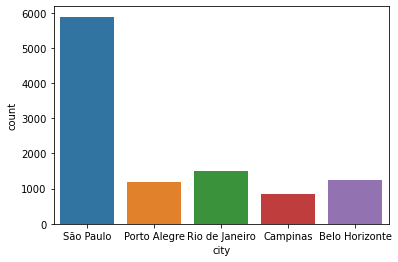

In [63]:
sns.countplot(x='city',data=df)

**Em baixo, segue a impressão de algumas estatísticas básicas dos atributos do dataset**

In [64]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


**Apresentação da correlação entre as variáveis.**

AxesSubplot(0.125,0.125;0.62x0.755)


,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,0.009321,0.578361,0.098378,0.597348,0.148684
hoa (R$),0.006890,0.007139,0.050271,0.009321,1.000000,0.036490,0.007627,0.029535,0.955024
rent amount (R$),0.180742,0.541758,0.668504,0.578361,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.955024,0.264490,0.218344,0.254911,1.000000


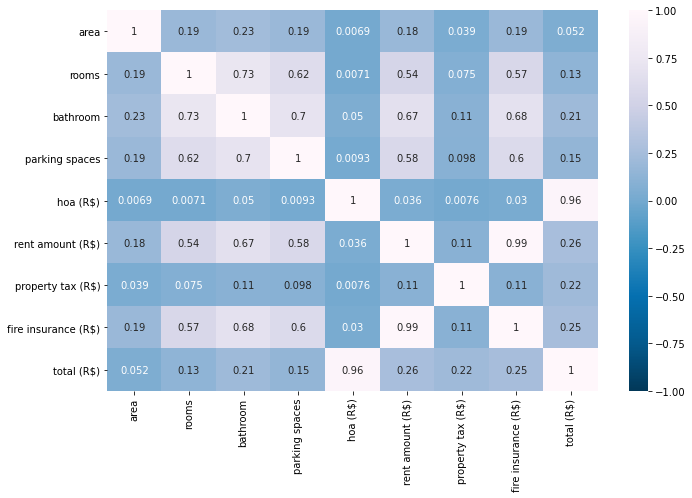

In [65]:
f, ax = plt.subplots(figsize=(11, 7))
print(sns.heatmap(df.corr(), annot=True, cmap='PuBu_r', linecolor='black',vmin=-1, vmax=1))
df.corr()

###### Olhando para o mapa de calor acima, percebe-se que há um problema de Multicolinearidade. Ou seja, as variáveis independentes "rent amount " e "fire insurance" apresentam uma corelação de 0.99 (quase uma relação exata). Isso é um problema muito comum em Regressões. Vamos visualizar um outro gráfico para ter mais noção dessa relação.

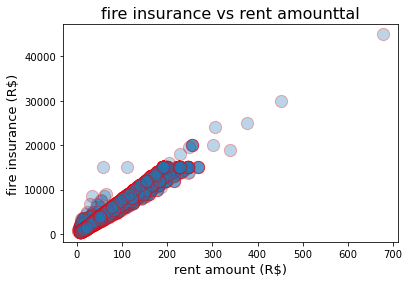

In [66]:
plt.scatter(x ='fire insurance (R$)', y = 'rent amount (R$)', data = df, s = 150, alpha = 0.3, edgecolor = 'red');
plt.title('fire insurance vs rent amounttal', fontsize = 16);
plt.ylabel('fire insurance (R$)', fontsize = 13);
plt.xlabel('rent amount (R$)', fontsize = 13);

**Apresentando o valor médio de casas por cidade.**

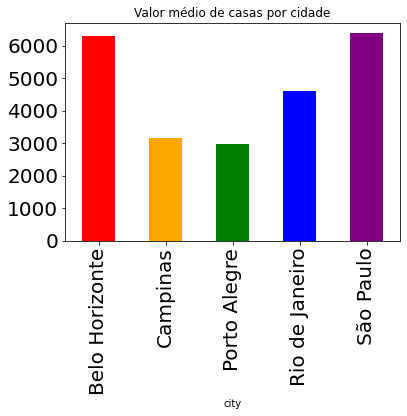

In [67]:
df.groupby(['city'])['total (R$)'].aggregate(lambda x: x.mean()).plot(kind='bar',
                                                                      color=['red','orange','green','blue','purple'],
                                                                      label='Average R$', title='Valor médio de casas por cidade', 
                                                                      fontsize=20);

**Relação entre cidade vs animal e cidade vs furniture**

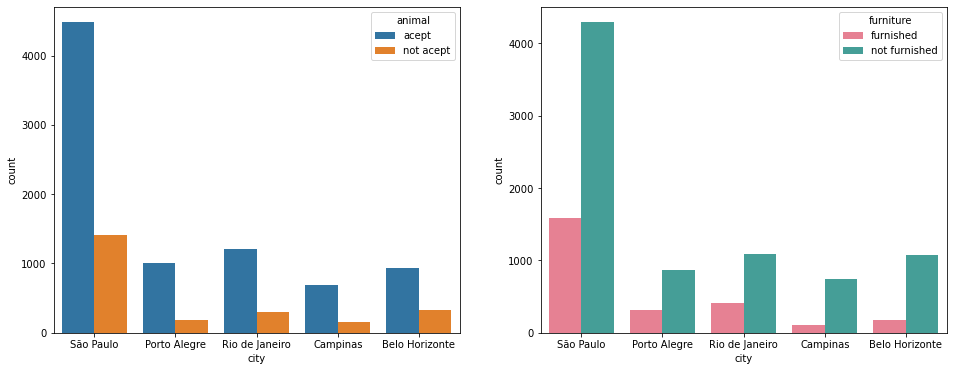

In [68]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.countplot(x='city', hue='animal', data=df, palette=sns.color_palette(), ax=axes[0]);
sns.countplot(x='city', hue='furniture', data=df, palette='husl', ax=axes[1]);

**Olhando para os Histogramas acima, pode se perceber que a maioria das casas aceitam animais (Figura a esquerda em azul) e na figura a direita, vê-se também que a maioria das casas não são mobiliadas.**

**Exibindo os dados do dataset para para ter noção sobre como estão distribuidos e também para auxiliar na verificação futura de valores discrepantes(outliers). Valores esses que podem causar desvios e comprometer a obtenção de ótimos resultados.**

HISTOGRAMA


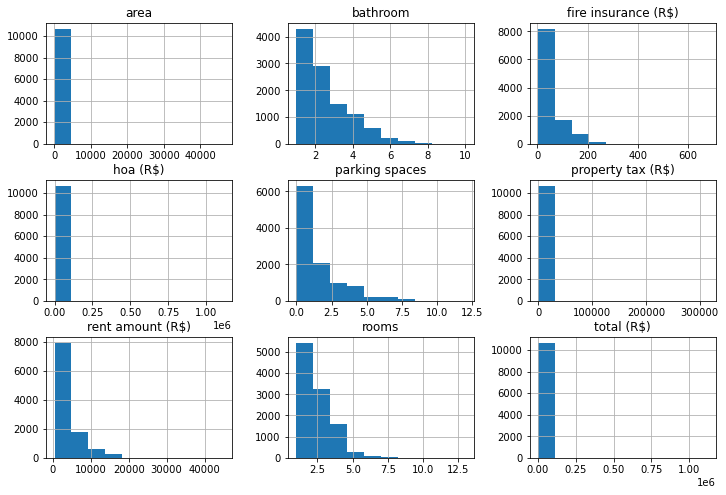

In [69]:
df.hist(figsize=(12, 8), bins=10)
print('HISTOGRAMA')

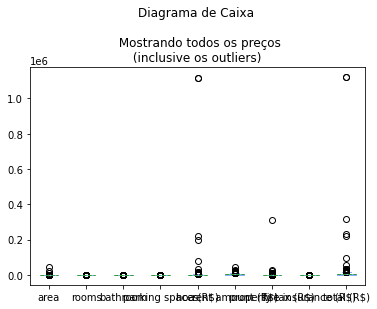

In [70]:
df.plot.box(color = '#8caeff', showmeans=True, meanline=True)
plt.title('Diagrama de Caixa \n \n Mostrando todos os preços\n (inclusive os outliers) ')

plt.show()

# 3 - Preparação de Dados

**Olhando para o Diagrama de Caixa e o Histograma acima, percebe-se que há valores extremamente discrepantes. Por exemplo: valores de "area", "property tax" e "total (R$)". Portanto, os valores do dataset precisam ser filtrados e mantidos apenas valores que realmente não vão causar desvios e consequentemente comprometer a obtenção de resultados que fazem sentido. Mas antes de realizarmos a filtragem, vamos certificar se realmente há valores extremamente discrepantes utilizando, além do Histograma, um Diagrama de Caixa. Vamos começar o processo de filtragem na coluna referente ao valor total dos imóveis.**

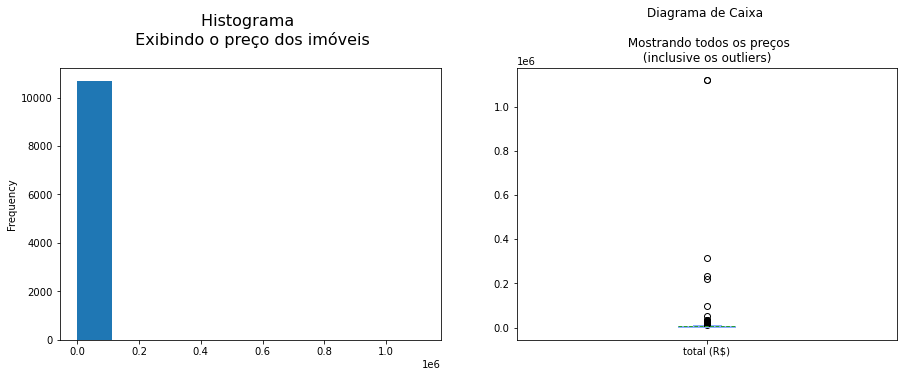

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df['total (R$)'].plot.hist(by='total',ax = axes[0])
axes[0].set_title('Histograma \n Exibindo o preço dos imóveis\n', fontsize = 16)

df['total (R$)'].plot.box(by='total (R$)', color = '#8caeff', showmeans=True, meanline=True)
plt.title('Diagrama de Caixa \n \n Mostrando todos os preços\n (inclusive os outliers) ')

plt.show()

**Agora, podemos ver que há valores extremamente discrepantes nos dados que constituem o valor dos imóveis. Portanto, esses valores do serão filtrados e mantidos apenas valores inferiores ou iguais a 20000.**

In [72]:
df = df[df['total (R$)'] <= 20000]

In [73]:
print('Tamanho atual dos dados: ', df.shape)

Tamanho atual dos dados:  (10568, 13)


**Visualizando dados após ter realizado a filtragem**

Diagrama de Caixa


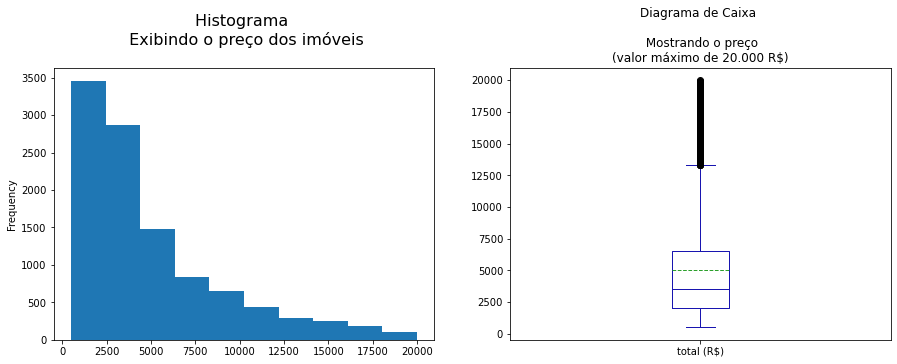

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df['total (R$)'].plot.hist(by='total',ax = axes[0])
axes[0].set_title('Histograma \n Exibindo o preço dos imóveis\n', fontsize = 16)

print('Diagrama de Caixa')
df['total (R$)'].plot.box(by='total (R$)', color = '#1815b0', showmeans=True, meanline=True)
plt.title('Diagrama de Caixa \n \n Mostrando o preço\n(valor máximo de 20.000 R$)')

plt.show()

**Em seguida, vamos filtrar o valor da área do imóvel que também contém valores discrepantes. Sendo assim, vamos realizar o mensmo procedimento feito com os valores da coluna "total" (Valor total pago). Mas antes disso, vamos certificar se realmente existe outliers nos dados da "area".**

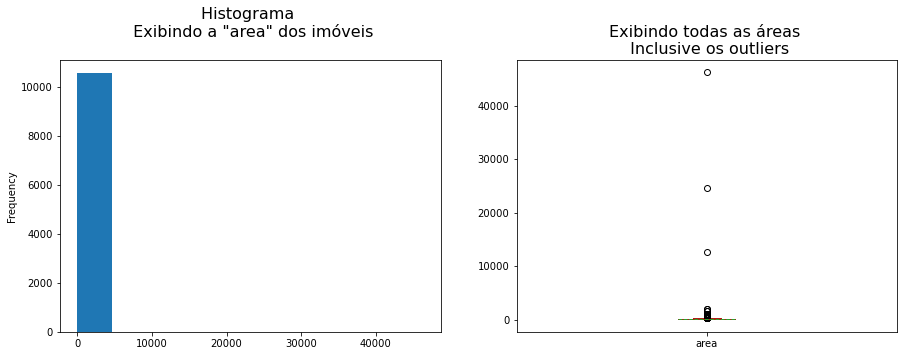

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


df['area'].plot.hist(by='area',ax = axes[0])
axes[0].set_title('Histograma \n Exibindo a "area" dos imóveis\n', fontsize = 16)

df['area'].plot.box(by='area', color = '#b01f15', showmeans=True, meanline=True)
plt.title('Exibindo todas as áreas \n Inclusive os outliers', fontsize=16)

plt.show()

**Olhando para o Histograma e o Diagrama de Caixa acima, percebe-se que há valores extremamente discrepantes. Por exemplo: a maior parte dos valores se encontram abaixo de 6000, enquanto que há valores na faixa dos 10000, 20000 e até superior a 40000. Portanto, vamos filtrá-los e manter apenas os preços menores ou iguais a 500.**

In [76]:
df = df[df['area'] <= 500]

In [77]:
print('Tamanho atual dos dados: ', df.shape)

Tamanho atual dos dados:  (10363, 13)


**Após ter filtrado os valores discrepantes da área, segue a forma como os tais dados se encontram.**

Diagrama de Caixa


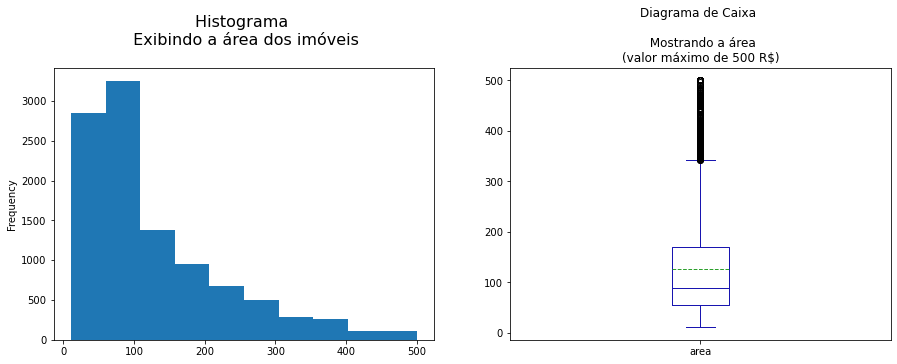

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df['area'].plot.hist(by='area',ax = axes[0])
axes[0].set_title('Histograma \n Exibindo a área dos imóveis\n', fontsize = 16)

print('Diagrama de Caixa')
df['area'].plot.box(by='area', color = '#1815b0', showmeans=True, meanline=True)
plt.title('Diagrama de Caixa \n \n Mostrando a área\n(valor máximo de 500 R$)')

plt.show()

**Seguindo a mesma lógica, vamos filtrar os valores do IPTU também.  Mas antes disso, segue a apresentação dos valores do IPTU no Histograma e no Diagrama de Caixa**

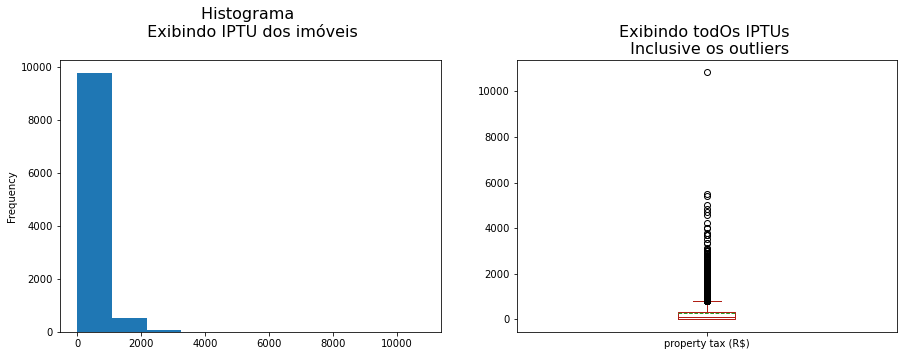

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


df['property tax (R$)'].plot.hist(by='property tax (R$)',ax = axes[0])
axes[0].set_title('Histograma \n Exibindo IPTU dos imóveis\n', fontsize = 16)

df['property tax (R$)'].plot.box(by='property tax (R$)', color = '#b01f15', showmeans=True, meanline=True)
plt.title('Exibindo todOs IPTUs \n Inclusive os outliers', fontsize=16)

plt.show()

**Realizando a filtragem: Para este caso, vamos considerar somente valores menores ou iguais a 3000**

In [80]:
df = df[df['property tax (R$)'] <= 3000]

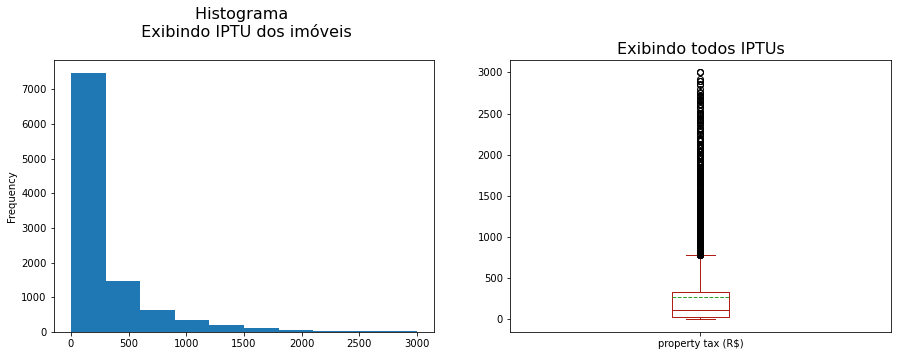

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


df['property tax (R$)'].plot.hist(by='property tax (R$)',ax = axes[0])
axes[0].set_title('Histograma \n Exibindo IPTU dos imóveis\n', fontsize = 16)

df['property tax (R$)'].plot.box(by='property tax (R$)', color = '#b01f15', showmeans=True, meanline=True)
plt.title('Exibindo todos IPTUs', fontsize=16)

plt.show()

In [82]:
print('Tamanho atual dos dados: ', df.shape)

Tamanho atual dos dados:  (10343, 13)


**Checado se há outliers no valor da renda**

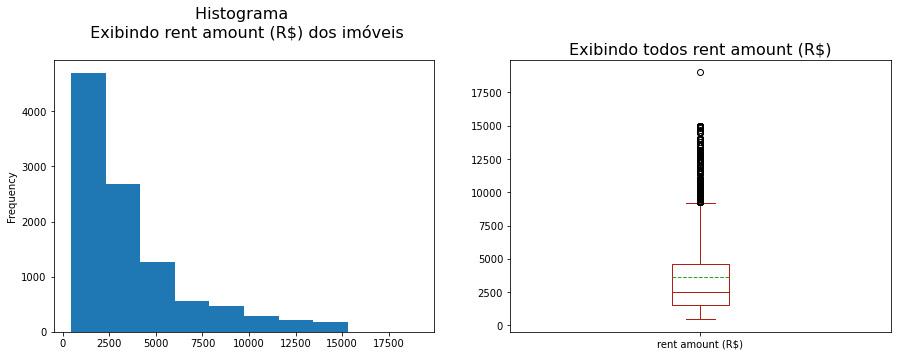

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


df['rent amount (R$)'].plot.hist(by='rent amount (R$)',ax = axes[0])
axes[0].set_title('Histograma \n Exibindo rent amount (R$) dos imóveis\n', fontsize = 16)

df['rent amount (R$)'].plot.box(by='rent amount (R$)', color = '#b01f15', showmeans=True, meanline=True)
plt.title('Exibindo todos rent amount (R$)', fontsize=16)

plt.show()

**O diagrama de Caixa mostra que há outlier no valor de aluguel. Portanto, vamos realizar a filtragem e manter os valores menores ou iguais a 16250 (Baseando no diagrama de caixa).**

In [84]:
df = df[df['rent amount (R$)'] <= 16250]
print('Tamanho atual do dataset', df.shape)

Tamanho atual do dataset (10342, 13)


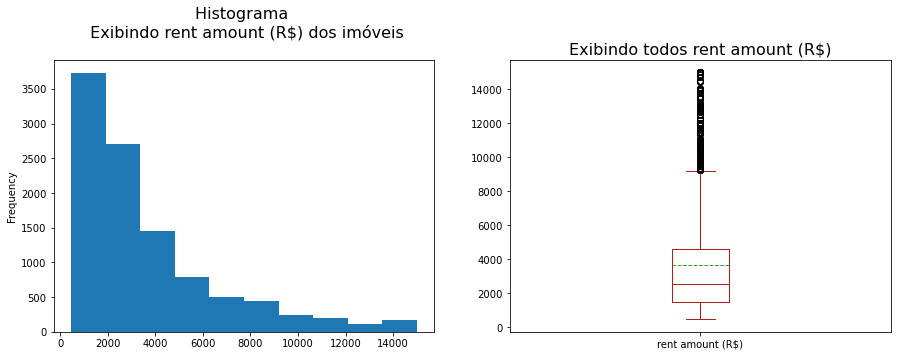

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


df['rent amount (R$)'].plot.hist(by='rent amount (R$)',ax = axes[0])
axes[0].set_title('Histograma \n Exibindo rent amount (R$) dos imóveis\n', fontsize = 16)

df['rent amount (R$)'].plot.box(by='rent amount (R$)', color = '#b01f15', showmeans=True, meanline=True)
plt.title('Exibindo todos rent amount (R$)', fontsize=16)

plt.show()

**Tamanho atual do valor de aluguel após filtrar dados.**

In [86]:
print('Tamanho atual do dataset', df.shape)

Tamanho atual do dataset (10342, 13)


**Checando se há ouliers no valor de Condomínio**

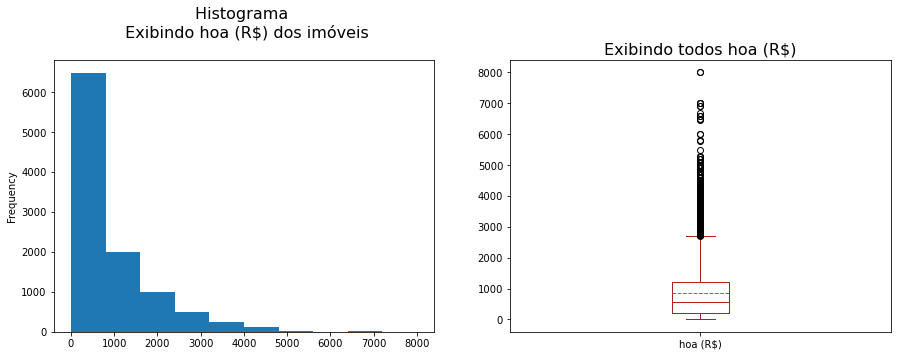

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


df['hoa (R$)'].plot.hist(by='hoa (R$)',ax = axes[0])
axes[0].set_title('Histograma \n Exibindo hoa (R$) dos imóveis\n', fontsize = 16)

df['hoa (R$)'].plot.box(by='hoa (R$)', color = '#b01f15', showmeans=True, meanline=True)
plt.title('Exibindo todos hoa (R$)', fontsize=16)

plt.show()

**O diagrama de Caixa mostra que há outlier no valor de condomínio. Portanto, vamos realizar a filtragem e manter os valores menores ou iguais a 7200 (Baseando no diagrama de caixa).**

In [88]:
df = df[df['hoa (R$)'] < 7250]
print('Tamanho atual do dataset', df.shape)

Tamanho atual do dataset (10340, 13)


**Formato atual do valor de condomínio após filtrar dados.**

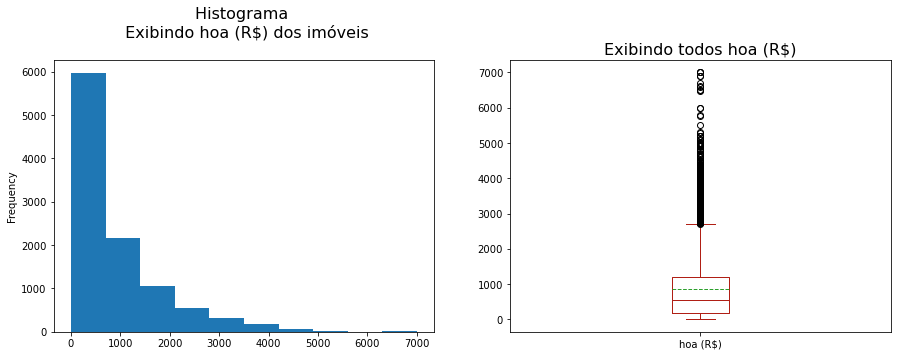

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


df['hoa (R$)'].plot.hist(by='hoa (R$)',ax = axes[0])
axes[0].set_title('Histograma \n Exibindo hoa (R$) dos imóveis\n', fontsize = 16)

df['hoa (R$)'].plot.box(by='hoa (R$)', color = '#b01f15', showmeans=True, meanline=True)
plt.title('Exibindo todos hoa (R$)', fontsize=16)

plt.show()

**Tamanho atual do valor de condomínio após filtrar dados.**

In [90]:
print('Tamanho atual do dataset', df.shape)

Tamanho atual do dataset (10340, 13)


In [91]:
for i in df.select_dtypes('object'):
    print(i,df[i].unique())

city ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
floor ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '21' '12' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
animal ['acept' 'not acept']
furniture ['furnished' 'not furnished']


**O "floor" contém hífen entre seus valores. No documento descritivo deste dataset, o autor afirma que se trata de locais que não estão em um andar específico (como por exemplo: uma casa).  Portanto, vamos consider esse hífen como uma casa.**

In [92]:
df['floor'] = df['floor'].apply(lambda x: -1 if x == '-' else x).astype(int)    

In [93]:
for i in df.select_dtypes('object'):
    print(i,df[i].unique())

city ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
animal ['acept' 'not acept']
furniture ['furnished' 'not furnished']


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10340 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10340 non-null  object
 1   area                 10340 non-null  int64 
 2   rooms                10340 non-null  int64 
 3   bathroom             10340 non-null  int64 
 4   parking spaces       10340 non-null  int64 
 5   floor                10340 non-null  int32 
 6   animal               10340 non-null  object
 7   furniture            10340 non-null  object
 8   hoa (R$)             10340 non-null  int64 
 9   rent amount (R$)     10340 non-null  int64 
 10  property tax (R$)    10340 non-null  int64 
 11  fire insurance (R$)  10340 non-null  int64 
 12  total (R$)           10340 non-null  int64 
dtypes: int32(1), int64(9), object(3)
memory usage: 1.1+ MB


**Transformando dados categóricos (como "city", "animal" e "furniture") em dados fictícios**

In [95]:
dummy_city = pd.get_dummies(df.city, prefix='city')
dummy_animal = pd.get_dummies(df.animal, prefix='animal',drop_first = True) 
dummy_furniture = pd.get_dummies(df.furniture, prefix='furniture',drop_first = True)

print(dummy_animal.head())
print('\n',dummy_furniture.head())
print('\n \n', dummy_city.head())

   animal_not acept
0                 0
1                 0
2                 0
3                 0
4                 1

    furniture_not furnished
0                        0
1                        1
2                        1
3                        1
4                        1

 
    city_Belo Horizonte  city_Campinas  city_Porto Alegre  city_Rio de Janeiro  \
0                    0              0                  0                    0   
1                    0              0                  0                    0   
2                    0              0                  1                    0   
3                    0              0                  1                    0   
4                    0              0                  0                    0   

   city_São Paulo  
0               1  
1               1  
2               0  
3               0  
4               1  


**Concatendo as variáveis transformadas**

In [96]:
df = pd.concat([df,dummy_city], axis=1)
df = pd.concat([df,dummy_animal], axis=1)
df = pd.concat([df,dummy_furniture], axis=1)

df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_not acept,furniture_not furnished
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,0,0,0,0,1,0,0
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,0,0,0,0,1,0,1
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,0,0,1,0,0,0,1
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,0,0,1,0,0,0,1
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,0,0,0,0,1,1,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10340 entries, 0 to 10691
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   city                     10340 non-null  object
 1   area                     10340 non-null  int64 
 2   rooms                    10340 non-null  int64 
 3   bathroom                 10340 non-null  int64 
 4   parking spaces           10340 non-null  int64 
 5   floor                    10340 non-null  int32 
 6   animal                   10340 non-null  object
 7   furniture                10340 non-null  object
 8   hoa (R$)                 10340 non-null  int64 
 9   rent amount (R$)         10340 non-null  int64 
 10  property tax (R$)        10340 non-null  int64 
 11  fire insurance (R$)      10340 non-null  int64 
 12  total (R$)               10340 non-null  int64 
 13  city_Belo Horizonte      10340 non-null  uint8 
 14  city_Campinas            10340 non-nul

**Segue a nova correlação entre os dados transformados**

AxesSubplot(0.125,0.125;0.62x0.755)


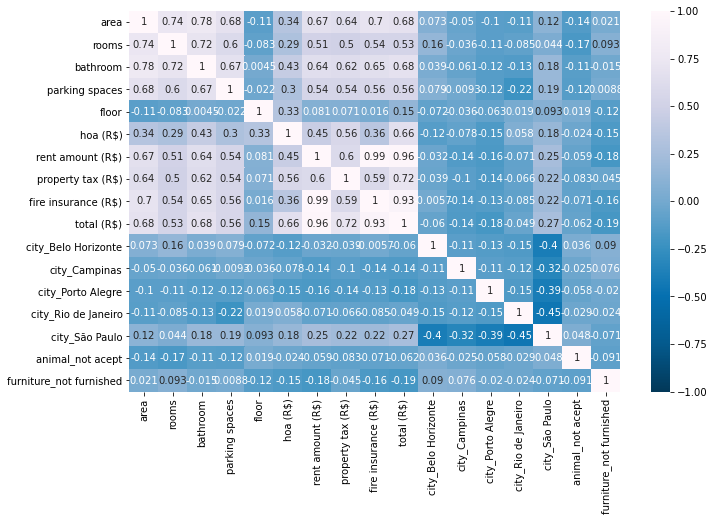

In [98]:
f, ax = plt.subplots(figsize=(11, 7))
print(sns.heatmap(df.corr(), annot=True, cmap='PuBu_r', linecolor='black',vmin=-1, vmax=1))

In [99]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)',
       'city_Belo Horizonte', 'city_Campinas', 'city_Porto Alegre',
       'city_Rio de Janeiro', 'city_São Paulo', 'animal_not acept',
       'furniture_not furnished'],
      dtype='object')

# 4 Modelagem

**Vamos delimitar agora esse trabalho apenas para as as casas de São Paulo.**

In [100]:
df_Sao_Paulo = df.loc[df['city'] == 'São Paulo']

In [101]:
# Variável Dependente
X_var = df_Sao_Paulo[['hoa (R$)','rent amount (R$)','property tax (R$)']]

# Variável Independente
y_var = df_Sao_Paulo['total (R$)']

**Dividindo os dados em variáveis de treinamento e variáveis de teste**

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

In [103]:
# Usando regressor
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
# Predizendo com r2 score
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9999897957930416

In [105]:
# Coeficientes 
regressor.coef_

array([0.9953513 , 1.01371692, 1.00552226])

In [106]:
# Intercept
regressor.intercept_

1.4504494441362112

**estando com o primeiro valor do Data Frame**

In [107]:
valor_teste = df_Sao_Paulo.loc[0][12]
valor_teste

5618

In [108]:
df_Sao_Paulo.loc[0]

city                       São Paulo
area                              70
rooms                              2
bathroom                           1
parking spaces                     1
floor                              7
animal                         acept
furniture                  furnished
hoa (R$)                        2065
rent amount (R$)                3300
property tax (R$)                211
fire insurance (R$)               42
total (R$)                      5618
city_Belo Horizonte                0
city_Campinas                      0
city_Porto Alegre                  0
city_Rio de Janeiro                0
city_São Paulo                     1
animal_not acept                   0
furniture_not furnished            0
Name: 0, dtype: object

In [109]:
#predizendo um valor, inserir:
'''  

X_var = df_Sao_Paulo[['hoa (R$)','rent amount (R$)','property tax (R$)']]

'''
predicted = int(regressor.predict([[2065,3300,211]]))

print("O valor predito era pra ser {:03d} R$ e o que foi predito é {:03d} R$.".format(valor_teste,int(predicted)))

diferenca = valor_teste - predicted

print("com uma diferença de {:02d} R$.".format(int(diferenca)))

O valor predito era pra ser 5618 R$ e o que foi predito é 5614 R$.
com uma diferença de 04 R$.


# 5 Avaliação

**Utilizando o método OLS para ter uma visão geral do funcionamento do regressor**

In [110]:
import statsmodels.api as sm 
from termcolor import colored as cl # para mudar fonte do terminal e deixar em negrito

slr_model = sm.OLS(y_var, X_var) # Ordinary Least Squares 
slr_reg = slr_model.fit()

# Imprimindo o relatório final
print(cl(slr_reg.summary(),attrs = ['bold']))

                                 OLS Regression Results                                
Dep. Variable:             total (R$)   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.147e+09
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        18:24:57   Log-Likelihood:                         -20519.
No. Observations:                5650   AIC:                                  4.104e+04
Df Residuals:                    5647   BIC:                                  4.106e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### 6 Disponibilização